Free energy in the unbound state (kcal/mol): -5.166573345
Free energy in the bound state (kcal/mol): -33.461018826
Free energy difference (kcal/mol): -28.294445481


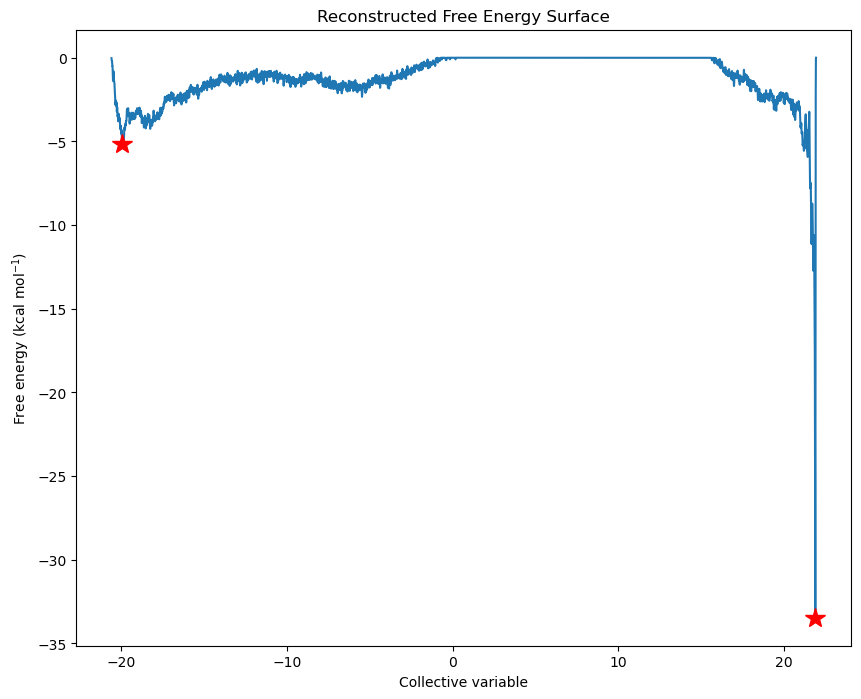

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fes = np.loadtxt("fes.dat", skiprows=10)
# process data
cv = fes[:, 0].T
free_energy = fes[:, 1].T

# plot reconstructed free energy
fig = plt.figure(figsize=(10,8))

plt.plot(cv, free_energy)
#plt.xlabel(r"Distance from the center ($\AA$)")
plt.xlabel(r"Collective variable")
plt.ylabel(r"Free energy (kcal mol$^{-1}$)")
plt.title("Reconstructed Free Energy Surface")

# find minimum between -25 <= cv <= -10
min_region_ub = np.where((cv >= -25) & (cv <= -10))
min_index_ub = np.argmin(free_energy[min_region_ub])
min_cv_ub = cv[min_region_ub][min_index_ub]
min_fe_ub = free_energy[min_region_ub][min_index_ub]

# find minimum between 10 <= cv <= 25
min_region_b = np.where((cv >= 10) & (cv <= 25))
min_index_b = np.argmin(free_energy[min_region_b])
min_cv_b = cv[min_region_b][min_index_b]
min_fe_b = free_energy[min_region_b][min_index_b]

# add stars to plot
plt.plot(min_cv_ub, min_fe_ub, marker="*", color="red", markersize=15)
plt.plot(min_cv_b, min_fe_b, marker="*", color="red", markersize=15)

print("Free energy in the unbound state (kcal/mol):", min_fe_ub)
print("Free energy in the bound state (kcal/mol):", min_fe_b)
print("Free energy difference (kcal/mol):", min_fe_b - min_fe_ub)

# save figure
fig.savefig('../../figures/reconstructed_fes.png', dpi=300)
